### IMDB映画レビューデータセットの準備

In [1]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2021-04-07 09:43:20--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`aclImdb_v1.tar.gz' に保存中

aclImdb_v1.tar.gz   100%[===================>]  80.23M  5.97MB/s 時間 15s        

2021-04-07 09:43:36 (5.36 MB/s) - `aclImdb_v1.tar.gz' へ保存完了 [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unl

In [2]:
ls

Sprint6_decision_tree_draft.ipynb  sprint9_FNN_draft.ipynb
Week1_01_prev.ipynb                week1_prod_01.ipynb
Week1_03 (1_7) .ipynb              week1_prod_02.ipynb
aclImdb/                           week1_prod_03.ipynb
aclImdb_v1.tar.gz                  week2_prev_01.ipynb
sprint21_NLP_draft.ipynb           week2_prev_02.ipynb
sprint3_linear_reg_draft.ipynb     week2_prev_04.ipynb
sprint8_ensemble_draft.ipynb       week3_prev_01_draft.ipynb


In [3]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [7]:
print("x : {}".format(x_train[1]))

x : Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you're choice over this one, even the "Turbulence"-movies a

# BoW

In [8]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [9]:
# BoW は単語の登場回数のOne-hot表現

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()

# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


### N-gram

In [10]:
# ngram_rangeで利用するn-gramの範囲を指定する

vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())

display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## 【問題1】BoWのスクラッチ実装

In [79]:
import numpy as np

In [11]:
mini_dataset2 = \
                          ["This movie is SOOOO funny!!!",
                           "What a movie! I never",
                           "best movie ever!!!!! this movie"]

In [14]:
mini_dataset2[0]

'This movie is SOOOO funny!!!'

In [15]:
mini_dataset2[0].split(" ")

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [17]:
mini_dataset2[0].split(" ")

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [119]:
sentence0 = mini_dataset2[0].replace("!", "").split(" ")
sentence0

['This', 'movie', 'is', 'SOOOO', 'funny']

In [120]:
sentence1 = mini_dataset2[1].replace("!", "").split(" ")
sentence1

['What', 'a', 'movie', 'I', 'never']

In [121]:
sentence2 = mini_dataset2[2].replace("!", "").split(" ")
sentence2

['best', 'movie', 'ever', 'this', 'movie']

In [122]:
sentence0 + sentence1 +  sentence2

['This',
 'movie',
 'is',
 'SOOOO',
 'funny',
 'What',
 'a',
 'movie',
 'I',
 'never',
 'best',
 'movie',
 'ever',
 'this',
 'movie']

In [123]:
# set で重複を削除、リストではなくなる

set(sentence0 + sentence1 +  sentence2)

{'I',
 'SOOOO',
 'This',
 'What',
 'a',
 'best',
 'ever',
 'funny',
 'is',
 'movie',
 'never',
 'this'}

In [125]:
word_list = list(set(sentence0 + sentence1 +  sentence2))
word_list

['movie',
 'I',
 'SOOOO',
 'funny',
 'This',
 'never',
 'best',
 'this',
 'ever',
 'a',
 'is',
 'What']

In [126]:
word_list.sort()
word_list

['I',
 'SOOOO',
 'This',
 'What',
 'a',
 'best',
 'ever',
 'funny',
 'is',
 'movie',
 'never',
 'this']

In [127]:
out0 = np.zeros((len(word_list)))
out0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [129]:
if sentence0[0]==word_list[0]:
    out0 += 1

out0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [135]:
# column1[0]=="This" があったところに１を足す

out0 = np.zeros((len(word_list)))

for i, word in enumerate(word_list):
    
    if sentence0[0]==word:
        out0[i] += 1
        
out0

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [139]:
# sentence0 について

out0 = np.zeros((len(word_list)))

for sentence in sentence0:
    
    for i, word in enumerate(word_list):
    
        if sentence==word:
            out0[i] += 1
            
out0

array([0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.])

In [144]:
sentence_counts = 3

out = np.zeros((sentence_counts, len(word_list)))

out.shape, out

((3, 12),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [146]:
mini_dataset2[0]

'This movie is SOOOO funny!!!'

In [160]:
sentence_counts = 3
out = np.zeros((sentence_counts, len(word_list)))


for sentence in mini_dataset2[0].split(" "):
    
    for i, word in enumerate(word_list):
    
        if sentence==word:
            out[0, i] += 1
            
out

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [175]:
sentence_counts = 3
out = np.zeros((sentence_counts, len(word_list)))

for j in range(sentence_counts):

    for sentence in mini_dataset2[j].split(" "):

        for i, word in enumerate(word_list):

            if sentence==word:
                out[j, i] += 1
            
out = out.astype(np.int)
out

array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1]])

In [176]:
df =  pd.DataFrame(out, columns=word_list)
df

,I,SOOOO,This,What,a,best,ever,funny,is,movie,never,this
0,0,1,1,0,0,0,0,0,1,1,0,0
1,1,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,2,0,1


### uni-gram

In [425]:
def uni_gram(X):

    """
    listを受け取りuni-gramのBoWを返す
    """
    
    word_list = []

    for i in range(len(X)):

        split = X[i].replace("!", "").split(" ")
        word_list.extend(split)
        
    word_list = list(set(word_list))
    word_list.sort()
    sentence_counts = len(X)
    out = np.zeros((sentence_counts, len(word_list)))


    for j in range(sentence_counts):

        for sentence in X[j].replace("!", "").split(" "):

            for i, word in enumerate(word_list):

                if sentence==word:
                    out[j, i] += 1

                    
    out = out.astype(np.int)
    df =  pd.DataFrame(out, columns=word_list)
    
    return df

In [426]:
uni_gram(mini_dataset2)

,I,SOOOO,This,What,a,best,ever,funny,is,movie,never,this
0,0,1,1,0,0,0,0,1,1,1,0,0
1,1,0,0,1,1,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0,0,2,0,1


In [424]:
mini_dataset2

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

### bi-gram

In [325]:
def bi_gram(X):

    """
    listを受け取りbi-gramのBoWを返す
    """
    
    word_list = []
    X_lists = []
    
    for a in range(len(X)):
        
        X_list = []
        X_lists.append(X_list)
        
        for b in range(len(X[a].split(" ")) - 1):
            
            split = " ".join(X[a].replace("!", "").split(" ")[b : b+2])
            split_list = []
            split_list.append(split)
            word_list.extend(split_list)
            X_list.append(split_list)
    
    word_list = list(set(word_list))
    word_list.sort()
    sentence_counts = len(X)
    out = np.zeros((sentence_counts, len(word_list)))


    for j in range(sentence_counts):

        for sentence in X_lists[j]:
            
            sentence = "".join(sentence)

            for i, word in enumerate(word_list):
                
                if sentence==word:
                    out[j, i] += 1
    
    out = out.astype(np.int)
    df =  pd.DataFrame(out, columns=word_list)
    
    return df

In [326]:
bi_gram(mini_dataset2)

,I never,SOOOO funny,This movie,What a,a movie,best movie,ever this,is SOOOO,movie I,movie ever,movie is,this movie
0,0,1,1,0,0,0,0,1,0,0,1,0
1,1,0,0,1,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,1,0,0,1,0,1


### IDF

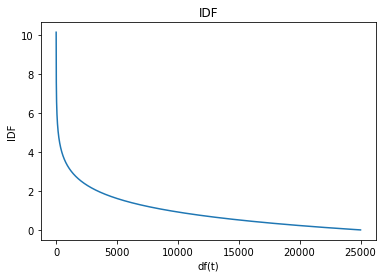

In [327]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)

plt.show()

### ストップワード

In [328]:
# 頻出トークンを取り除く

vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [330]:
!pip install nltk

     |████████████████████████████████| 1.4 MB 4.3 MB/s eta 0:00:01
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
     |████████████████████████████████| 285 kB 13.6 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434671 sha256=46246a24cbeadebd4eec3cbd94594ea6544fb8e36788be361707e3f1a9d51db6
  Stored in directory: /Users/teruitakahiro/Library/Caches/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [331]:
import nltk

stop_words = nltk.download('stopwords')


from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/teruitakahiro/nltk_data...


stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data]   Unzipping corpora/stopwords.zip.


In [332]:
# 次元の呪い回避のために、登場回数の少ないトークンを切る

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## 【問題2】TF-IDFの計算

In [387]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [388]:
type(x_train), len(x_train)

(list, 25000)

In [389]:
vectorizer = TfidfVectorizer(
                                                  stop_words=stop_words,
                                                  #oken_pattern=r”(?u)\b\w\w+\b”,
                                                  max_features=5000,
                                                  norm=None,
                                                  )

In [390]:
x_train_vec = vectorizer.fit_transform(x_train)

In [391]:
print(vectorizer.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '1930', '1930s', '1933', '1940', '1950', '1950s', '1960', '1960s', '1968', '1970', '1970s', '1971', '1972', '1973', '1980', '1980s', '1983', '1984', '1987', '1990', '1993', '1995', '1996', '1997', '1999', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '20th', '24', '25', '2nd', '30', '3000', '30s', '35', '3d', '3rd', '40', '45', '50', '50s', '60', '60s', '70', '70s', '80', '80s', '90', '90s', '99', 'abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'act

In [392]:
x_train_vec.shape

(25000, 5000)

In [393]:
x_test_vec

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1978769 stored elements in Compressed Sparse Row format>

In [394]:
x_test_vec = vectorizer.fit_transform(x_test)
x_test_vec

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1963651 stored elements in Compressed Sparse Row format>

In [395]:
x_test_vec.shape

(25000, 5000)

## 【問題3】TF-IDFを用いた学習

In [399]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train_vec, y_train)

DecisionTreeClassifier(random_state=0)

In [401]:
y_pred = clf.predict(x_test_vec)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [402]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.53748

## 【問題4】TF-IDFのスクラッチ実装

### 標準式

In [540]:
def tf_idf_usual(X):

    """
    listを受け取りuni-gramのTF-IDFを返す
    """
    
    word_list = []

    for i in range(len(X)):

        split = X[i].replace("!", "").split(" ")
        word_list.extend(split)
        
    word_list = list(set(word_list))
    word_list.sort()
    sentence_counts = len(X)
    out = np.zeros((sentence_counts, len(word_list)))


    for j in range(sentence_counts):

        for sentence in X[j].replace("!", "").split(" "):

            for i, word in enumerate(word_list):
                
                if sentence==word:
                    out[j, i] += 1
    
    
    out = out.astype(np.float64)
    
    # TF
    for j in range(sentence_counts):
        for i in range(len(word_list)): 
            if  out[j, i] >= 1e-7:
                out[j, i] /= len(X[j].split(" "))
            
    #print(out)
    
    # IDF        
    elem_nonzero = np.count_nonzero(out, axis=0)
    
    for i in range(len(word_list)):
        for j in range(sentence_counts):
            if out[j, i] >= 1e-7:
                out[j, i] *= np.log(sentence_counts / elem_nonzero[i])
                
    #print(out)
                
    df =  pd.DataFrame(out, columns=word_list)
    
    return df

In [541]:
df = tf_idf_usual(mini_dataset2)
df

,I,SOOOO,This,What,a,best,ever,funny,is,movie,never,this
0,0.000000,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722,0.0,0.000000,0.000000
1,0.219722,0.000000,0.000000,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.0,0.219722,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722,0.000000,0.000000,0.0,0.000000,0.219722


### scilit-learn式

In [542]:
def tf_idf_sklearn(X):

    """
    listを受け取りuni-gramのTF-IDFを返す
    """
    
    word_list = []

    for i in range(len(X)):

        split = X[i].replace("!", "").split(" ")
        word_list.extend(split)
        
    word_list = list(set(word_list))
    word_list.sort()
    sentence_counts = len(X)
    out = np.zeros((sentence_counts, len(word_list)))


    for j in range(sentence_counts):

        for sentence in X[j].replace("!", "").split(" "):

            for i, word in enumerate(word_list):
                
                if sentence==word:
                    out[j, i] += 1
    
    
    out = out.astype(np.float64)
    
    # TF
    #for j in range(sentence_counts):
    #    for i in range(len(word_list)): 
    #        if  out[j, i] >= 1e-7:
    #            out[j, i] /= len(X[j].split(" "))
            
    #print(out)
    
    # IDF        
    elem_nonzero = np.count_nonzero(out, axis=0)
    
    for i in range(len(word_list)):
        for j in range(sentence_counts):
            if out[j, i] >= 1e-7:
                out[j, i] *= np.log(1 + sentence_counts / 1 + elem_nonzero[i]) + 1
                
    #print(out)
                
    df =  pd.DataFrame(out, columns=word_list)
    
    return df

In [543]:
tf_idf_sklearn(mini_dataset2)

,I,SOOOO,This,What,a,best,ever,funny,is,movie,never,this
0,0.000000,2.609438,2.609438,0.000000,0.000000,0.000000,0.000000,2.609438,2.609438,2.94591,0.000000,0.000000
1,2.609438,0.000000,0.000000,2.609438,2.609438,0.000000,0.000000,0.000000,0.000000,2.94591,2.609438,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,2.609438,2.609438,0.000000,0.000000,5.89182,0.000000,2.609438


# Word2Vec

In [545]:
!pip install gensim

     |████████████████████████████████| 23.9 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 7.2 MB/s  eta 0:00:01


In [553]:
from gensim.models import Word2Vec
#from gensim.models import word2vec


sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(min_count=1, max_vocab_size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs) # 学習

#print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
print("語彙の一覧 : {}".format(model.wv.key_to_index.keys()))

for vocab in model.wv.key_to_index.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie'])
veryのベクトル : 
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
  4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.39850

In [554]:
# 単語の距離

model.wv.most_similar(positive="good", topn=3)

[('this', 0.17018884420394897),
 ('film', 0.14595063030719757),
 ('a', 0.0640898048877716)]

In [656]:
# 可視化

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#vocabs = model.wv.vocab.keys()
vocabs = model.wv.key_to_index.keys()
print(list(vocabs))
print(type(list(vocabs)))
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
#vectors_tsne = tsne_model.fit_transform(model[vocabs])
vectors_tsne = tsne_model.fit_transform(model.wv.vocabs)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
    
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

['this', 'that', 'movie']
<class 'list'>


AttributeError: 'KeyedVectors' object has no attribute 'vocabs'

## 【問題5】コーパスの前処理

#### 小文字化

In [581]:
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [585]:
x_train_lowed = x_train.copy()

for i in range(len(x_train)):
    x_train_lowed[i] = x_train[i].lower()

In [587]:
x_train_lowed[0]

"zero day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />it is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. in terms of explaining the motives and actions of the two young suicide/murderers it is better than 'elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />flawed but honest with a terrible honesty."

#### 特殊文字等の削除

In [638]:
x_train_preprocessed = x_train_lowed.copy()

for i in range(len(x_train)):
    x_train_preprocessed[i] = re.sub(r"[^a-zA-Z0-9]"," ",x_train_lowed[i])

In [639]:
x_train_preprocessed[0]

'zero day leads you to think  even re think why two boys young men would do what they did   commit mutual suicide via slaughtering their classmates  it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction  br    br   it is not a perfect movie but given what money time the filmmaker and actors had   it is a remarkable product  in terms of explaining the motives and actions of the two young suicide murderers it is better than  elephant    in terms of being a film that gets under our  rationalistic  skin it is a far  far better film than almost anything you are likely to see   br    br   flawed but honest with a terrible honesty '

#### リスト化

In [640]:
x_train_list = x_train_preprocessed.copy()

for i in range(len(x_train)):
    x_train_list[i] = list(x_train_preprocessed[i].split(" "))
    
#list(x_train_preprocessed[0].split(" "))

In [642]:
x_train_list[0]

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 '',
 'even',
 're',
 'think',
 'why',
 'two',
 'boys',
 'young',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 '',
 '',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 '',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'own',
 'mutual',
 'world',
 'via',
 'coupled',
 'destruction',
 '',
 'br',
 '',
 '',
 '',
 'br',
 '',
 '',
 'it',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'money',
 'time',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 '',
 '',
 'it',
 'is',
 'a',
 'remarkable',
 'product',
 '',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicide',
 'murderers',
 'it',
 'is',
 'better',

#### ３文字以下の単語を削除

In [654]:
x_train_deled = x_train_list.copy()

for i in range(len(x_train)):
    x_train_deled[i] = [j for j in x_train_deled[i] if len(j) > 3]
    
#list(x_train_preprocessed[0].split(" "))

In [655]:
x_train_deled[0]

['zero',
 'leads',
 'think',
 'even',
 'think',
 'boys',
 'young',
 'would',
 'what',
 'they',
 'commit',
 'mutual',
 'suicide',
 'slaughtering',
 'their',
 'classmates',
 'captures',
 'what',
 'must',
 'beyond',
 'bizarre',
 'mode',
 'being',
 'humans',
 'have',
 'decided',
 'withdraw',
 'from',
 'common',
 'civility',
 'order',
 'define',
 'their',
 'mutual',
 'world',
 'coupled',
 'destruction',
 'perfect',
 'movie',
 'given',
 'what',
 'money',
 'time',
 'filmmaker',
 'actors',
 'remarkable',
 'product',
 'terms',
 'explaining',
 'motives',
 'actions',
 'young',
 'suicide',
 'murderers',
 'better',
 'than',
 'elephant',
 'terms',
 'being',
 'film',
 'that',
 'gets',
 'under',
 'rationalistic',
 'skin',
 'better',
 'film',
 'than',
 'almost',
 'anything',
 'likely',
 'flawed',
 'honest',
 'with',
 'terrible',
 'honesty']

## 【問題6】Word2Vecの学習

In [653]:
model = Word2Vec(min_count=1, max_vocab_size=10) # 次元数を10に設定

model.build_vocab(x_train_deled) # 準備
model.train(x_train_deled, total_examples=model.corpus_count, epochs=model.epochs) # 学習

(55142, 16871410)